In [1]:
import numpy as np
import random
from imutils import paths 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import tensorflow
from PIL import Image
tensorflow.compat.v1.logging.set_verbosity((tensorflow.compat.v1.logging.ERROR)) #comment while debugging
from tensorflow.keras.applications import ResNet50V2, ResNet50, Xception #https://keras.io/api/applications/
from tensorflow.keras.layers import Input, GlobalMaxPooling2D,  Dropout , Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#!git clone https://github.com/farhansiddiqui/cnn-class.git

In [3]:
base_path = "."
#base_path = "/content"

In [4]:
img_height = 128
img_width = 128

baseModel = ResNet50V2(weights='imagenet', include_top=False,input_tensor=Input(shape=(img_height, img_width, 3)))
model = tensorflow.keras.Sequential([
    baseModel,
    GlobalMaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),    
    Dense(6, activation="softmax")
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 4, 4, 2048)        23564800  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3

In [6]:
baseModel.trainable = False
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [7]:
image_size = (img_height, img_width)
batch_size = 64


trainAug = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=5,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest")

train_ds = trainAug.flow_from_directory(
    f"{base_path}/flowers-v-auto/training",
    class_mode="categorical",
    target_size=image_size,
    batch_size=batch_size)

valAug = ImageDataGenerator(rescale=1 / 255.0)

val_ds = valAug.flow_from_directory(
    f"{base_path}/flowers-v-auto/validation",
    class_mode="categorical",
    target_size=image_size,
    batch_size=batch_size)

test_ds = valAug.flow_from_directory(
    f"{base_path}/flowers-v-auto/testing",
    class_mode="categorical",
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False)


Found 4860 images belonging to 6 classes.
Found 540 images belonging to 6 classes.
Found 606 images belonging to 6 classes.


In [8]:
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
epochs = 100
hist = model.fit( train_ds, epochs=epochs, validation_data=val_ds, callbacks = [es])

Epoch 1/100
76/76 [==============================] - 23s 304ms/step - loss: 2.4360 - accuracy: 0.5547 - val_loss: 0.3485 - val_accuracy: 0.9074
Epoch 2/100
76/76 [==============================] - 22s 287ms/step - loss: 0.8316 - accuracy: 0.7183 - val_loss: 0.2563 - val_accuracy: 0.9111
Epoch 3/100
76/76 [==============================] - 22s 286ms/step - loss: 0.6295 - accuracy: 0.7887 - val_loss: 0.1998 - val_accuracy: 0.9333
Epoch 4/100
76/76 [==============================] - 22s 288ms/step - loss: 0.5134 - accuracy: 0.8150 - val_loss: 0.1977 - val_accuracy: 0.9296
Epoch 5/100
76/76 [==============================] - 22s 286ms/step - loss: 0.4499 - accuracy: 0.8521 - val_loss: 0.1731 - val_accuracy: 0.9278
Epoch 6/100
76/76 [==============================] - 22s 288ms/step - loss: 0.4141 - accuracy: 0.8570 - val_loss: 0.1475 - val_accuracy: 0.9407
Epoch 7/100
76/76 [==============================] - 22s 287ms/step - loss: 0.4163 - accuracy: 0.8549 - val_loss: 0.1453 - val_accuracy:

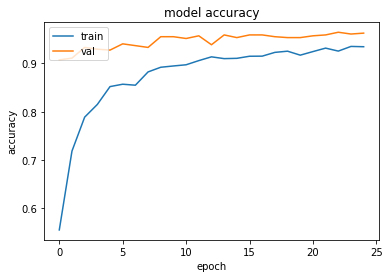

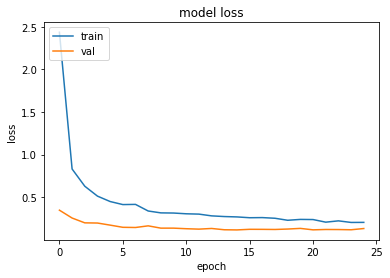

In [9]:

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
baseModel.trainable = True
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [11]:
hist2 = model.fit( train_ds, epochs=epochs, validation_data=val_ds, callbacks = [es])

Epoch 1/100
76/76 [==============================] - 23s 308ms/step - loss: 0.9165 - accuracy: 0.7282 - val_loss: 0.1535 - val_accuracy: 0.9481
Epoch 2/100
76/76 [==============================] - 22s 292ms/step - loss: 0.6977 - accuracy: 0.7969 - val_loss: 0.1821 - val_accuracy: 0.9333
Epoch 3/100
76/76 [==============================] - 22s 292ms/step - loss: 0.5399 - accuracy: 0.8333 - val_loss: 0.1976 - val_accuracy: 0.9278
Epoch 4/100
76/76 [==============================] - 22s 288ms/step - loss: 0.4182 - accuracy: 0.8613 - val_loss: 0.1979 - val_accuracy: 0.9333
Epoch 5/100
76/76 [==============================] - 22s 289ms/step - loss: 0.3720 - accuracy: 0.8817 - val_loss: 0.1890 - val_accuracy: 0.9370
Epoch 6/100
76/76 [==============================] - 22s 287ms/step - loss: 0.3292 - accuracy: 0.8971 - val_loss: 0.1825 - val_accuracy: 0.9407
Epoch 7/100
76/76 [==============================] - 22s 286ms/step - loss: 0.3284 - accuracy: 0.9016 - val_loss: 0.1782 - val_accuracy:

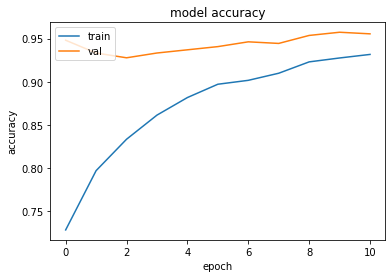

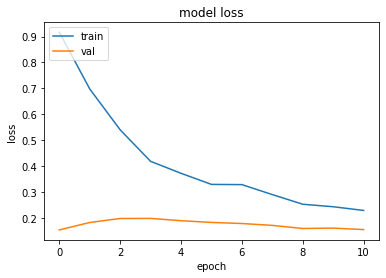

In [12]:
# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
imagePaths = list(paths.list_images(f'{base_path}/flowers-v-auto/testing'))

trucks


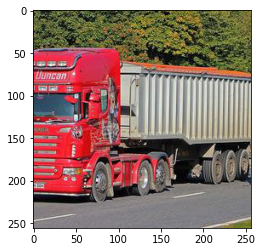

In [14]:
image = random.choice(imagePaths)
print(image.split('/')[-1].split('-')[0])
img = Image.open(image)
plt.imshow(img)

In [15]:
img = img.resize((img_height, img_width))
img_batch = np.expand_dims(np.asarray(img)/255, axis=0)
prediction_class_idx = np.argmax(model.predict(img_batch), axis=-1)[0]
dict(map(reversed, test_ds.class_indices.items()))[prediction_class_idx]

'trucks'

In [16]:
def plot_confusion_matrix(cm, classes):
    cmap=plt.cm.Blues
    title='Confusion Matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [17]:
predictions = model.predict_generator(test_ds, steps=(len(test_ds.filenames) // batch_size) + 1)
predIdxs = np.argmax(predictions, axis=1) 


In [18]:
# predictions
 cm = tensorflow.math.confusion_matrix(labels=test_ds.labels, predictions=predIdxs).numpy()

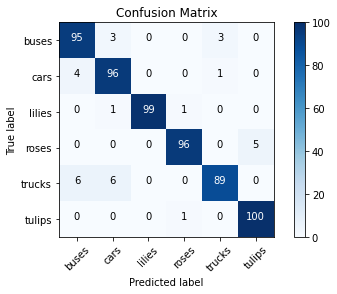

In [19]:
plot_confusion_matrix(cm, test_ds.class_indices)

In [21]:
#test accuracy 
round((test_ds.labels == predIdxs).sum()/len(predictions),2)

0.95